In [4]:
import tensorflow

In [5]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [55]:
pwd

'C:\\Users\\dell'

In [6]:
IMAGE_SIZE = [224, 224]

train_path = 'F:\\data\\train'
valid_path = 'F:\\data\\test'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('F:\\data\\train\*')

In [10]:
len(folders)

4

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('F:\\data\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('F:\\data\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\dell\AppData\Local\Temp\ipykernel_3296\4039646700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 289s 4s/step - loss: 2.4406 - accuracy: 0.7278 - val_loss: 0.3326 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 271s 4s/step - loss: 0.6902 - accuracy: 0.8919 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 308s 5s/step - loss: 0.4994 - accuracy: 0.9057 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 357s 6s/step - loss: 0.5827 - accuracy: 0.8965 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 382s 6s/step - loss: 0.5647 - accuracy: 0.9067 - val_loss: 0.2102 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 361s 6s/step - loss: 0.4613 - accuracy: 0.9313 - val_loss: 0.3372 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 379s 6s/step - loss: 0.4974 - accuracy: 0.9354 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 8/20
61

In [19]:
import matplotlib.pyplot as plt

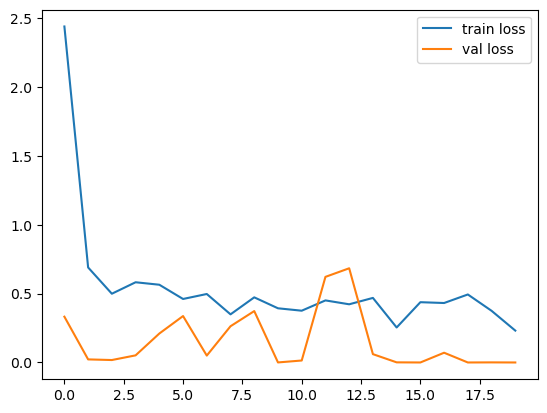

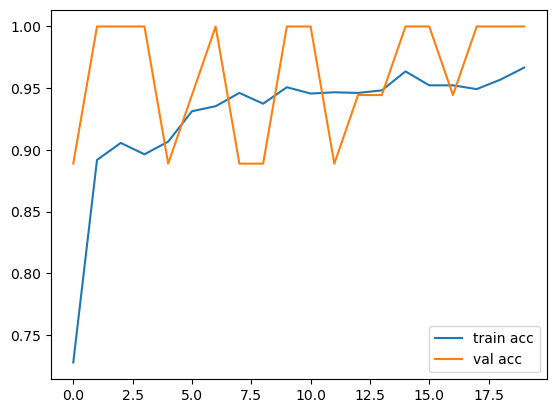

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:
y_pred = model.predict(test_set)

1/1 [==============================] - 47s 47s/step


In [23]:
y_pred

array([[9.10051792e-24, 1.00000000e+00, 2.64314740e-21, 1.78880818e-17],
       [2.49341963e-21, 5.22608575e-17, 3.05033191e-21, 1.00000000e+00],
       [3.64507583e-22, 3.21203663e-21, 1.00000000e+00, 2.56101238e-12],
       [1.00000000e+00, 1.06756303e-33, 1.97501614e-22, 5.09640654e-31],
       [1.00000000e+00, 7.93419096e-13, 1.90860611e-16, 4.03418337e-19],
       [1.07737913e-23, 1.46864644e-17, 1.00000000e+00, 8.44592233e-27],
       [4.13923444e-27, 1.00000000e+00, 8.81196605e-20, 1.17608928e-12],
       [3.95552508e-17, 8.60340717e-27, 1.00000000e+00, 1.25854114e-16],
       [0.00000000e+00, 1.47282315e-21, 2.83035510e-36, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.74955879e-24],
       [1.00000000e+00, 0.00000000e+00, 1.81447136e-16, 6.55862029e-13],
       [5.53551031e-26, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09007225e-12, 5.41377424e-36, 1.00000000e+00, 1.41751731e-16],
       [4.70972286e-21, 9.99999046e-01, 2.33698672e

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 3, 2, 0, 0, 2, 1, 2, 3, 1, 0, 1, 2, 1, 3, 3, 2, 3], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_inception.h5')

In [28]:
img=image.load_img('F:\\data\\test\\fresh cotton leaf\\d (378).jpg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)
x

array([[[ 50.,  43.,  35.],
        [ 53.,  48.,  42.],
        [ 63.,  56.,  50.],
        ...,
        [156., 191., 135.],
        [138., 173., 105.],
        [159., 193., 142.]],

       [[ 83.,  70.,  61.],
        [103.,  93.,  83.],
        [110.,  98.,  84.],
        ...,
        [121., 159.,  72.],
        [167., 196., 138.],
        [171., 204., 151.]],

       [[125., 111.,  98.],
        [152., 134., 120.],
        [166., 149., 133.],
        ...,
        [156., 186., 122.],
        [140., 175., 107.],
        [152., 188., 118.]],

       ...,

       [[182., 166., 151.],
        [179., 166., 149.],
        [172., 159., 143.],
        ...,
        [173., 202., 158.],
        [166., 193., 148.],
        [177., 203., 158.]],

       [[136., 124., 112.],
        [159., 146., 130.],
        [160., 148., 132.],
        ...,
        [181., 207., 160.],
        [177., 203., 158.],
        [176., 202., 155.]],

       [[104.,  95.,  80.],
        [124., 111.,  95.],
        [152., 1

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 7s 7s/step


array([[9.99561369e-01, 1.15379025e-05, 3.40227794e-04, 8.68371790e-05]],
      dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 202ms/step


In [35]:
a==1

array([False])

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.11.0'